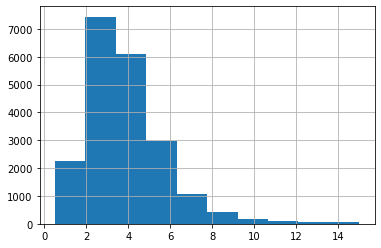

In [7]:
housing['median_income'].hist()

注解：

上面这个图说明：median_income这个变量数据不够集中，这样会导致一定的偏差
所以后面的代码通过将收入中位数除以 1.5（以限制收入分类的数量），创建了一个收入类别属性，用`ceil`对值舍入（以产生离散的分类），然后将所有大于 5的分类归入到分类 5：

In [8]:
import numpy as np
housing['trimmed_income'] = np.ceil(housing['median_income']/1.5)
# 下面这个where是numpy里的，形式是where(condition, x, y)，具体来说:(if condtion = True, then = x, else = y)
# 使用失败了，所以先标记着，暂时不用，还没找到原因 (2020/10/28)
#np.where(housing['trimmed_income'] < 5, housing['trimmed_income'], 5)


# 下面这个where()是pandas里的，形式是where(condition（为True则保留原值）, other = (也就是condition为False时的替代值), inplace为True则直接在原数组上修改，不创建新数组)
# 这个成功
housing['trimmed_income'].where(housing['trimmed_income'] < 5, 5.0, inplace = True) 
housing['trimmed_income'].describe()

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: trimmed_income, dtype: float64

作为对比，这是用第一种不成功的办法的输出：

count    20640.000000
mean         3.093362
std          1.303707
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: trimmed_income, dtype: float64

以下进行分层采样：

stratify v.分层
shuffle v.洗牌

StratifiedShuffleSplit函数的使用

1.1 用法：
from  sklearn.model_selection import StratifiedShuffleSplit
StratifiedShuffleSplit(n_splits=10,test_size=None,train_size=None, random_state=None)

**1.2 参数说明**

n_splits：将训练数据分成train/test对的组数，可根据需要进行设置，默认为10

参数test_size和train_size是用来设置train/test对中train和test所占的比例。例如：
1.提供10个数据num进行训练和测试集划分
2.设置train_size=0.8 test_size=0.2
3.train_num=num*train_size=8 test_num=num*test_size=2
4.即10个数据，进行划分以后8个是训练数据，2个是测试数据

注*：train_num≥2，test_num≥2 ;test_size+train_size可以小于1*

参数 random_state控制是将样本随机打乱的方式

In [9]:
'''
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
'''
from sklearn.model_selection import StratifiedShuffleSplit # n_split = 1，说明只迭代了一次，也就是下面的for循环只会进行一次
split_method = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42) # 这里只是定义了一种分类方法
for train_index, test_index in split_method.split(housing, housing['trimmed_income']): # 下面才是实际执行的分类
    stratifird_train_set = housing.loc[train_index]
    stratifird_test_set = housing.loc[test_index]

# 分测试集，训练集和总体看一看分层采样的结果
# pandas.value_counts()是可以count到某个变量下的（也就是字典的）出现数量
#stratifird_test_set["trimmed_income"].value_counts() / len(stratifird_test_set)
#stratifird_train_set["trimmed_income"].value_counts() / len(stratifird_train_set)
#housing["trimmed_income"].value_counts() / len(housing)

stratifird_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,trimmed_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0


#以下是分层采样的结果

频数    测试集       训练集       总体
1.0    0.039729     0.039850     0.039826
2.0    0.318798     0.318859     0.318847
3.0    0.350533     0.350594     0.350581
4.0    0.176357     0.176296     0.176308
5.0    0.114583     0.114402     0.114438

Name: trimmed_income, dtype: float64

In [10]:
for set_ in (stratifird_train_set, stratifird_test_set):
    set_.drop("trimmed_income", axis=1, inplace=True)

# 数据探索和可视化、发现规律

In [11]:
# 在我们的案例中，数据集很小，所以可以在全集上直接工作。创建一个副本，以免损伤训练集：
housing = stratifird_train_set.copy()

# 地理数据可视化

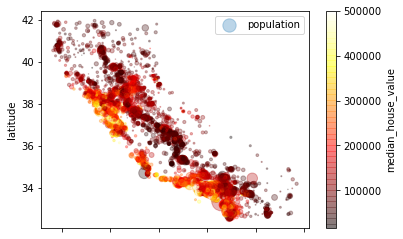

In [12]:
# 创建一个所有街区的散点图以实现数据可视化

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = .3,
            s = housing['population']/100, label = 'population', 
            c = 'median_house_value', cmap = plt.get_cmap('hot'), colorbar = True)

plt.legend()

# alpha:不透明度。alpha越小越透明，这样可以让密集的点显得更深
# s: 半径大小
# c: 颜色
# cmap: 颜色。具体有哪几种颜色见：https://matplotlib.org/examples/color/colormaps_reference.html
# plt.legend()：加上图例

# 相关系数矩阵

In [13]:
# 数据挖掘：创造一些新的变量

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] # 每户房间数
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # 卧室数/总房间数。这个比例越低，可能代表房子越大
housing["population_per_household"]=housing["population"]/housing["households"] # 每户人数
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [14]:
'''
housing.plot(kind = 'scatter', x = 'rooms_per_household', y = 'median_house_value', alpha = .2)
plt.axis([0,5,0,500000]) # [x_min, x_max, y_min, y_max]
plt.show()
'''
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 为机器学习算法准备数据

In [15]:
#housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
#housing_labels = strat_train_set["median_house_value"].copy()

housing = stratifird_train_set.drop('median_house_value', axis=1) # 不会删除这个变量，只是做一个删除后copy
housing_labels = stratifird_train_set['median_house_value'].copy()
housing_labels


17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

# 数据清洗

变量total_bedroom有一些缺失值，我们有三种方式解决它：

+   去掉对应的街区；

+   去掉整个属性；

+   进行赋值（0、平均值、中位数等等）

用`DataFrame`的`dropna()`，`drop()`，和`fillna()`方法，可以方便地实现：

In [16]:
'''
housing.dropna(subset=["total_bedrooms"])    # 去掉0值
housing.drop("total_bedrooms", axis=1)       # 去掉整个变量
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)     # 填充中位数
'''

'\nhousing.dropna(subset=["total_bedrooms"])    # 去掉0值\nhousing.drop("total_bedrooms", axis=1)       # 去掉整个变量\nmedian = housing["total_bedrooms"].median()\nhousing["total_bedrooms"].fillna(median)     # 填充中位数\n'

Scikit-Learn 提供了一个方便的类来处理缺失值：`Imputer`。下面是其使用方法：首先，需要创建一个`Imputer`实例，指定用某属性的中位数来替换该属性所有的缺失值：

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
# 关于SimpleImputer的具体用法，可以见：https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

因为只有数值属性才能算出中位数，我们需要创建一份不包括文本属性`ocean_proximity`的数据副本：

In [18]:
housing_num = housing.drop('ocean_proximity', axis=1)

现在，就可以用`fit()`方法将`imputer`实例拟合到训练数据：

In [19]:
imputer.fit(housing_num) # 取的是列中的中位数。如果是平均值'mean'也是一样，都是取列中的

# ！！！！直接用fit_transform可以直接将fit和transform两个操作合二为一！！！！！

SimpleImputer(strategy='median')

`imputer`计算出了每个属性的中位数，并将结果保存在了实例变量`statistics_`中。虽然此时只有属性`total_bedrooms`存在缺失值，但我们不能确定在以后的新的数据中会不会有其他属性也存在缺失值，所以安全的做法是将`imputer`应用到每个数值：

In [20]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [21]:
housing_num.median().values # 从这里可以看出两者的结果是一样的

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

将缺失值替换为中位数：

In [22]:
x = imputer.transform(housing_num) # 将imputer中的结果应用到数据中！
housing_tr = pd.DataFrame(x, columns=housing_num.columns) # 放回到Pandas Dataframe中

# 处理文本和类别属性

对`ocean_proximity`这个特征进行预处理

In [23]:
housing[['ocean_proximity']] # 好像嵌套一个列表就可以出现DataFrame的格式？

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [24]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


前面，我们丢弃了类别属性`ocean_proximity`，因为它是一个文本属性，不能计算出中位数。大多数机器学习算法更喜欢和数字打交道，所以让我们把这些文本标签转换为数字。

Scikit-Learn 为这个任务提供了一个转换器`OrdinalEncoder`：

关于这个转换器的sklearn官方文档：https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [29]:
ordinal_encoder.categories_ 
# 从这里可以看出，这些类别是一一对应的
# 比如：‘<1H OCEAN’：0， 'INLAND'：1 等等

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

这种做法的问题是，ML 算法会认为两个临近的值比两个疏远的值要更相似。显然这样不对（比如，分类 0 和分类 1就比分类 0 和分类4更相似）。要解决这个问题，一个常见的方法是给每个分类创建一个二元属性：当分类是`<1H OCEAN`，该属性为 1（否则为 0），当分类是`INLAND`，另一个属性等于 1（否则为 0），以此类推。这称作独热编码（One-Hot Encoding），因为只有一个属性会等于 1（热），其余会是 0（冷）。

Scikit-Learn 提供了一个编码器`OneHotEncoder`，用于将整数分类值转变为独热向量。注意`fit_transform()`用于 2D 数组，而`housing_cat_encoded`是一个 1D 数组，所以需要将其变形：

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray() # 默认返回的是一个稀疏矩阵，但是需要一个密集数组的话，可以用toarray()方法

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [38]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 自定义转换器

尽管 Scikit-Learn 提供了许多有用的转换器，你还是需要自己动手写转换器执行任务，比如自定义的清理操作，或属性组合。你需要让自制的转换器与 Scikit-Learn 组件（比如流水线）无缝衔接工作，因为 Scikit-Learn 是依赖鸭子类型的（而不是继承），你所需要做的是创建一个类并执行三个方法：`fit()`（返回`self`），`transform()`，和`fit_transform()`。通过添加`TransformerMixin`作为基类，可以很容易地得到最后一个。另外，如果你添加`BaseEstimator`作为基类（且构造器中避免使用`*args`和`**kargs`），你就能得到两个额外的方法（`get_params() `和`set_params()`），二者可以方便地进行超参数自动微调。例如，一个小转换器类添加了上面讨论的属性：


In [39]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [66]:
# 不错的顺序取值代码
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ['total_rooms',
       'total_bedrooms', 'population', 'households']]

from sklearn.preprocessing import FunctionTransformer
def add_extra_features(X, add_bedrooms_per_room = True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix] # X[:, index]index是列标签
    population_per_household = X[:,population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household] # what's np.c_?

feature_adder = FunctionTransformer(add_extra_features, validate= False, # what's FunctionTransformer?
                                   kw_args = {'add_bedrooms_per_room': True}) # 书里这个是False，即不要展现这个变量，我自己写的True
housing_extra_feature = feature_adder.fit_transform(housing.values)

In [67]:
housing_extra_feature = pd.DataFrame(housing_extra_feature, # data
                                     columns= list(housing.columns) + ['rooms_per_household', 'population_per_household','bedrooms_per_room'], 
                                     index = housing.index) # columns ：变量名， index：行标签
housing_extra_feature.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341


### 特征缩放

数据要做的最重要的转换之一是特征缩放。除了个别情况，当输入的数值属性量度不同时，机器学习算法的性能都不会好。这个规律也适用于房产数据：总房间数分布范围是 6 到 39320，而收入中位数只分布在 0 到 15。注意通常情况下我们不需要对目标值进行缩放。

有两种常见的方法可以让所有的属性有相同的量度：线性函数归一化（Min-Max scaling）和标准化（standardization）。

线性函数归一化（许多人称其为归一化（normalization））很简单：值被转变、重新缩放，直到范围变成 0 到 1。我们通过减去最小值，然后再除以最大值与最小值的差值，来进行归一化。Scikit-Learn 提供了一个转换器`MinMaxScaler`来实现这个功能。它有一个超参数`feature_range`，可以让你改变范围，如果不希望范围是 0 到 1。

标准化就很不同：首先减去平均值（所以标准化值的平均值总是 0），然后除以方差，使得到的分布具有单位方差。与归一化不同，标准化不会限定值到某个特定的范围，这对某些算法可能构成问题（比如，神经网络常需要输入值得范围是 0 到 1）。但是，标准化受到异常值的影响很小。例如，假设一个街区的收入中位数由于某种错误变成了100，归一化会将其它范围是 0 到 15 的值变为 0-0.15，但是标准化不会受什么影响。Scikit-Learn 提供了一个转换器`StandardScaler`来进行标准化。

> 警告：与所有的转换一样，缩放器只能向训练集拟合，而不是向完整的数据集（包括测试集）。只有这样，你才能用缩放器转换训练集和测试集（和新数据）。

# 转换流水线

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('feature_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [84]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # 数值型的转换器 + 数值型
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## 选择并训练模型

可到这一步了！你在前面限定了问题、获得了数据、探索了数据、采样了一个测试集、写了自动化的转换流水线来清理和为算法准备数据。现在，你已经准备好选择并训练一个机器学习模型了。

### 在训练集上训练和评估

In [80]:
from sklearn.linear_model import LinearRegression # 线性回归模型
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) # housing_labels：训练集的y值。这里是先拟合
housing_predictions = lin_reg.predict(housing_prepared)   # 这里进行预测
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [85]:
# 决策树什么的得分都不高 试试随机森林
from sklearn.ensemble import RandomForestRegressor
randomforest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
randomforest_reg.fit(housing_prepared, housing_labels)
randomforest_pred = randomforest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, randomforest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [87]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

forest_scores = cross_val_score(randomforest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122
